#### Step 1
- Task: stocks with big price jump during five tradining days.
- Data: stock price data in capiq_price_equity_kr.parquet file

In [1]:
import os
import pandas as pd
from dotenv import load_dotenv

In [2]:
# Load environment variables
load_dotenv(r"C:\Users\by003457\workspace\perfectdays\.env")
CAPIQ_DATA_DIR = os.environ["CAPIQ_DATA_DIR"]

In [3]:
# Load price data
compprice_file = os.path.join(CAPIQ_DATA_DIR, "capiq_price_equity_kr.parquet")
df_compprice = pd.read_parquet(compprice_file)

In [9]:
# Load company data
compinfo_file = os.path.join(CAPIQ_DATA_DIR, "comp_naics_code_common_stock_kr.parquet")
df_compinfo = pd.read_parquet(compinfo_file)

In [10]:
df_compinfo.head(2)

,tradingItemId,securityId,companyId,exchangeName,exchangeSymbol,tickerSymbol,ISOCode,isoCountry2,companyName,NAICS,...,desc_2,level_3,code_3,desc_3,level_4,code_4,desc_4,level_5,code_5,desc_5
0,1937019783,1870961429,26840462,KOSDAQ,KOSDAQ,A475430,KRW,KR,"KISTRON Co., Ltd.",331222,...,Primary Metal Manufacturing,3.0,3312,Steel Product Manufacturing from Purchased Steel,4.0,33122,Rolling and Drawing of Purchased Steel,5.0,331222,Steel Wire Drawing
1,1899874192,270184252,29513698,KOSDAQ,KOSDAQ,A177900,KRW,KR,3A Logics Inc.,334413,...,Computer and Electronic Product Manufacturing,3.0,3344,Semiconductor and Other Electronic Component M...,4.0,33441,Semiconductor and Other Electronic Component M...,5.0,334413,Semiconductor and Related Device Manufacturing


In [11]:
# Search Samsung Electronics tradingItemId
df_compinfo[df_compinfo['companyName'].str.contains('Samsung Electronics')]['tradingItemId'].unique()

array(['20242977'], dtype=object)

In [14]:
tradingId_samsung = 20242977

In [28]:
dfprc_samsung = df_compprice[
    (df_compprice['tradingItemId'] == tradingId_samsung) & 
    (df_compprice['pricingDate'] > '2024-01-01')].copy()

In [29]:
# Sort by tradingItemId and date
dfprc_samsung = dfprc_samsung.sort_values(["tradingItemId", "pricingDate"])

In [30]:
# Calculate 5-day rolling percentage change for each stock
dfprc_samsung['pct_change_5d'] = dfprc_samsung.groupby('tradingItemId')['priceClose'].transform(lambda x: x.pct_change(periods=5))

In [31]:
dfprc_samsung

,tradingItemId,pricingDate,priceOpen,priceHigh,priceLow,priceMid,priceClose,priceBid,priceAsk,volume,adjustmentFactor,VWAP,pct_change_5d
4767777,20242977,2024-01-02,78200.000000,79800.000000,78200.000000,79550.000000,79600.000000,79500.000000,79600.000000,17142840.0,1.0000000000,79150.000000,NaN
4767778,20242977,2024-01-03,78500.000000,78800.000000,77000.000000,77050.000000,77000.000000,77000.000000,77100.000000,21753640.0,1.0000000000,77770.000000,NaN
4767779,20242977,2024-01-04,76100.000000,77300.000000,76100.000000,76650.000000,76600.000000,76600.000000,76700.000000,15324430.0,1.0000000000,76583.000000,NaN
4767780,20242977,2024-01-05,76700.000000,77100.000000,76400.000000,76650.000000,76600.000000,76600.000000,76700.000000,11304310.0,1.0000000000,76681.000000,NaN
4767781,20242977,2024-01-08,77000.000000,77500.000000,76400.000000,76550.000000,76500.000000,76500.000000,76600.000000,11088720.0,1.0000000000,76897.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768210,20242977,2025-10-16,95300.000000,97700.000000,95000.000000,97650.000000,97700.000000,97600.000000,97700.000000,28141060.0,1.0000000000,96975.000000,0.097752808988764044943820225
4768211,20242977,2025-10-17,97200.000000,99100.000000,96700.000000,97850.000000,97900.000000,97800.000000,97900.000000,22730800.0,1.0000000000,97889.000000,0.037076271186440677966101695
4768212,20242977,2025-10-20,97900.000000,98300.000000,96000.000000,98150.000000,98100.000000,98100.000000,98200.000000,17589750.0,1.0000000000,97500.000000,0.051446945337620578778135048
4768213,20242977,2025-10-21,98500.000000,99900.000000,97300.000000,97550.000000,97500.000000,97500.000000,97600.000000,22803830.0,1.0000000000,98786.000000,0.064410480349344978165938865


In [32]:
# Find stocks with big price jumps (e.g., >20%)
big_jumps = dfprc_samsung[dfprc_samsung['pct_change_5d'] > 0.1]

In [33]:
# Show results
big_jumps[['pricingDate', 'tradingItemId', 'priceClose', 'pct_change_5d']].head(10)

,pricingDate,tradingItemId,priceClose,pct_change_5d
4767994,2024-11-21,20242977,56400.000000,0.130260521042084168336673347
4768071,2025-03-20,20242977,60200.000000,0.100548446069469835466179159
4768072,2025-03-21,20242977,61700.000000,0.127970749542961608775137112
4768193,2025-09-16,20242977,79400.000000,0.110489510489510489510489510
4768206,2025-10-10,20242977,94400.000000,0.133253301320528211284513806
4768207,2025-10-13,20242977,93300.000000,0.108076009501187648456057007
4768209,2025-10-15,20242977,95000.000000,0.104651162790697674418604651


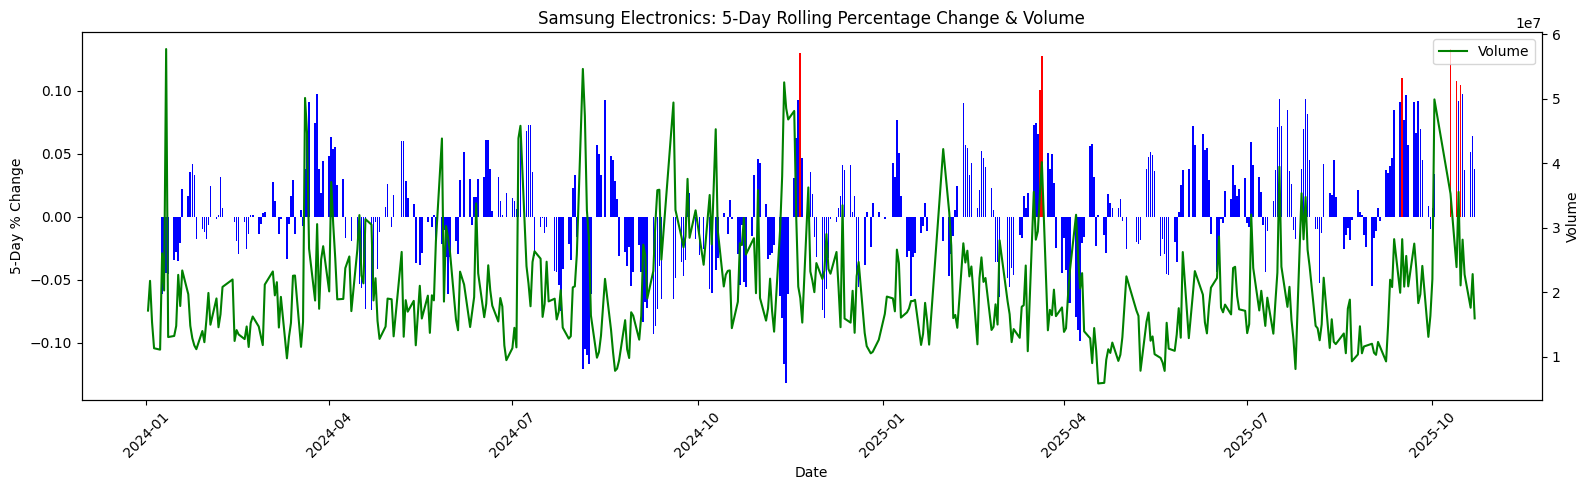

In [35]:
import matplotlib.pyplot as plt

# Plot bar chart of 5-day percentage change for Samsung Electronics
fig, ax1 = plt.subplots(figsize=(16,5))
bars = ax1.bar(dfprc_samsung['pricingDate'], dfprc_samsung['pct_change_5d'], color=(dfprc_samsung['pct_change_5d'] > 0.10).map({True: 'red', False: 'blue'}))
ax1.set_xlabel('Date')
ax1.set_ylabel('5-Day % Change')
ax1.set_title('Samsung Electronics: 5-Day Rolling Percentage Change & Volume')
ax1.tick_params(axis='x', rotation=45)

# Add volume as a line chart on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(dfprc_samsung['pricingDate'], dfprc_samsung['volume'], color='green', label='Volume')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()